# Modeling and Simulation in Python

Leila Merzenich


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [15]:
init  = State(R = 200, L = 0, E = 0, V = 4 * 10 ** (-7))
system = System(tau = .2, gamma = 1.36, mu = 1.36 * 10 ** (-3), beta = .00027, 
                rho = .1, alpha = 3.6 * 10 ** (-2), omega = 2, delta = .33, pi = 100, t0 = 0, t_end = 1200, dt = 0.1)
print(system)

tau         0.20000
gamma       1.36000
mu          0.00136
beta        0.00027
rho         0.10000
alpha       0.03600
omega       2.00000
delta       0.33000
pi        100.00000
t0          0.00000
t_end    1200.00000
dt          0.10000
dtype: float64


In [16]:
def update_func(state, t, system):
    R, L, E, V = state
    
    Rbirth = system.gamma * system.tau
    
    Rdeath = system.mu * R
    
    RtoLE = beta*R*V
    
    LtoE = system.alpha * L
    
    RtoE = (1- system.rho) * system.beta * R * V
    
    RtoL = system.rho * system.beta * R * V
    
    Ldeath = system.mu * L
    
    Edeath = system.delta * E
    
    Vbirth = system.pi * E
    
    Vdeath = system.omega * V
    
    dRdt = Rbirth - RtoLE - Rdeath
    dLdt = RtoL - Ldeath - LtoE
    dEdt = RtoE - Edeath + LtoE
    dVdt = Vbirth - Vdeath
    L += dLdt*dt
    E += dEdt*dt
    V += dVdt*dt
    R += dRdt*dt
    
    return State(R=R, L=L, E=E, V=V)

In [17]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [21]:
results = run_simulation(system, update_func)
def plot_results(R, L, E):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(R, '--', label='R')
    plot(L, '-', label='L')
    plot(E, ':', label='E')
    decorate(xlabel='Time (days)',
             ylabel='Number of Cells')
def plot_results2(V):
   
    plot(V, '*', label='V')
    decorate(xlabel='Time (days)',
             ylabel='Number of Virions')

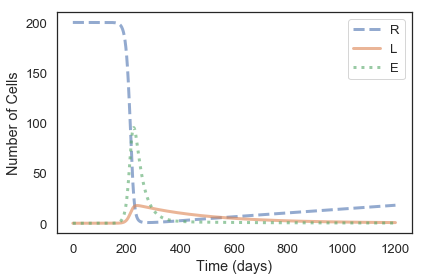

In [22]:
plot_results(results.R, results.L, results.E)

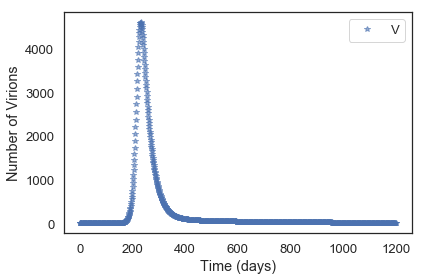

In [23]:
plot_results2(results.V)